**Follow the decision tree examples from chapter 3 of Harrington's *Machine Learning in Action* **

In [52]:
from math import log

In [53]:
def calcShannonEnt(dataSet):
    n_entries = len(dataSet)
    labelCounts = {}
    for featVec in dataSet:
        iLabel = featVec[-1]
        if iLabel not in labelCounts.keys(): labelCounts[iLabel] = 0            
        labelCounts[iLabel] += 1
    shannonEnt = 0.0
    for key in labelCounts:
        prob = float(labelCounts[key])/n_entries
        shannonEnt -= prob*log(prob,2)
    return shannonEnt

In [54]:
 def splitDataSet(dataSet, axis, value):
        retDataSet = []
        for featVec in dataSet:
            if featVec[axis] == value:
                reducedFeatVec = featVec[:axis] # Chop out axis used for splitting
                reducedFeatVec.extend(featVec[axis+1:])
                retDataSet.append(reducedFeatVec)
        return retDataSet

In [57]:
def chooseBestFeatureToSplit(dataSet):
    # Reducing entropy increases information    
    # High entropy is high uncertainty
    numFeatures = len(dataSet[0]) - 1      #the last column is used for the labels
    baseEntropy = calcShannonEnt(dataSet)
    bestInfoGain = 0.0; bestFeature = -1
    for i in range(numFeatures):        #iterate over all the features
        featList = [example[i] for example in dataSet]#create a list of all the examples of this feature
        uniqueVals = set(featList)       #get a set of unique values
        newEntropy = 0.0
        for value in uniqueVals:
            subDataSet = splitDataSet(dataSet, i, value)
            prob = len(subDataSet)/float(len(dataSet))
            newEntropy += prob * calcShannonEnt(subDataSet)     
        infoGain = baseEntropy - newEntropy     #calculate the info gain; ie reduction in entropy
        if (infoGain > bestInfoGain):       #compare this to the best gain so far
            bestInfoGain = infoGain         #if better than current best, set to best
            bestFeature = i
    return bestFeature                      #returns an integer

In [59]:
def majorityCnt(classList):
    classCount={}
    for vote in classList:
        if vote not in classCount.keys(): classCount[vote] = 0
        classCount[vote] += 1
    sortedClassCount = sorted(classCount.iteritems(), key=operator.itemgetter(1), reverse=True)
    return sortedClassCount[0][0]

In [60]:
def createTree(dataSet,labels):
    classList = [example[-1] for example in dataSet]
    if classList.count(classList[0]) == len(classList): 
        return classList[0]#stop splitting when all of the classes are equal
    if len(dataSet[0]) == 1: #stop splitting when there are no more features in dataSet
        return majorityCnt(classList)
    bestFeat = chooseBestFeatureToSplit(dataSet)
    bestFeatLabel = labels[bestFeat]
    myTree = {bestFeatLabel:{}}
    del(labels[bestFeat])
    featValues = [example[bestFeat] for example in dataSet]
    uniqueVals = set(featValues)
    for value in uniqueVals:
        subLabels = labels[:]       #copy all of labels, so trees don't mess up existing labels
        myTree[bestFeatLabel][value] = createTree(splitDataSet(dataSet, bestFeat, value),subLabels)
    return myTree                            

In [61]:
def classify(inputTree,featLabels,testVec):
    firstStr = inputTree.keys()[0]
    secondDict = inputTree[firstStr]
    featIndex = featLabels.index(firstStr)
    key = testVec[featIndex]
    valueOfFeat = secondDict[key]
    if isinstance(valueOfFeat, dict): 
        classLabel = classify(valueOfFeat, featLabels, testVec)
    else: classLabel = valueOfFeat
    return classLabel

In [64]:
%run ./Ch03_TreePlotter.ipynb # Use IPython Magic to include the tree plotting functions

**Classify an animal as a fish or not based on if it surfaces for water and has flippers**

In [55]:
def createDataSet():
    dataSet = [[1, 1, 'yes'],
               [1, 1, 'yes'],
               [1, 0, 'no'],
               [0, 1, 'no'],
               [0, 1, 'no']]
    labels = ['no surfacing','flippers']
    #change to discrete values
    return dataSet, labels

In [84]:
myDat,labels = createDataSet()
print(myDat)
print(calcShannonEnt(myDat))
print(splitDataSet(myDat,0,0))
print(calcShannonEnt(splitDataSet(myDat,0,0)))

[[1, 1, 'yes'], [1, 1, 'yes'], [1, 0, 'no'], [0, 1, 'no'], [0, 1, 'no']]
0.970950594455
[[1, 'no'], [1, 'no']]
0.0


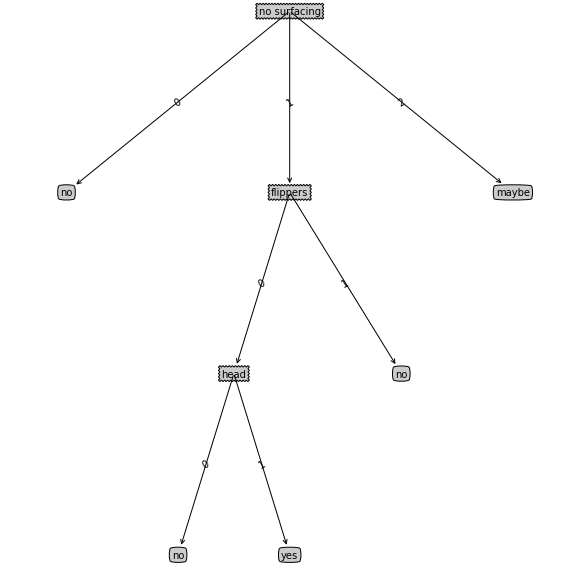

In [82]:
myTree = retrieveTree(1)
myTree['no surfacing'][2] = 'maybe'
createPlot(myTree)

**Predict contact lens type based on features from eye exams**

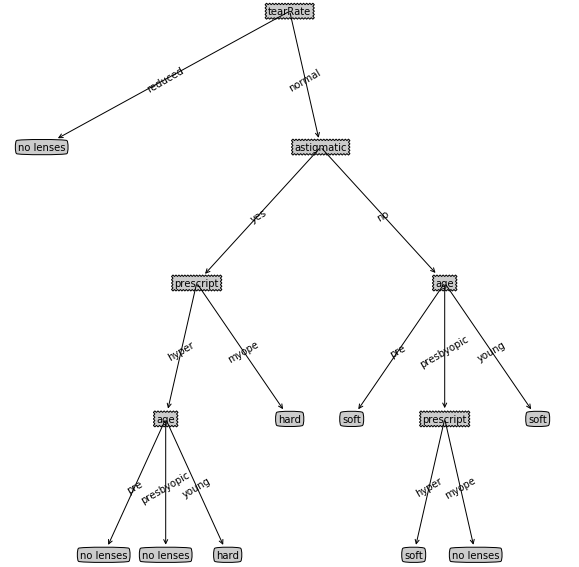

In [83]:
fr = open('./SourceMaterial/Ch03/lenses.txt')
lenses = [inst.strip().split('\t') for inst in fr.readlines()]
lensesLabels = ['age','prescript','astigmatic','tearRate']
lensesTree = createTree(lenses,lensesLabels)
createPlot(lensesTree)